In [99]:
from tensorflow.keras import models, layers, utils, backend as K 
import matplotlib.pyplot as plt
import shap
import numpy as np

In [100]:
# DeepNN model
n_features = 5
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 3)                 18        
                                                                 
 drop1 (Dropout)             (None, 3)                 0         
                                                                 
 h2 (Dense)                  (None, 2)                 8         
                                                                 
 drop2 (Dropout)             (None, 2)                 0         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [101]:
# define metrics
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error', 
              metrics=[R2])

In [102]:
# generate some random data using numpy
X = np.random.rand(1000, n_features)
# y = np.random.choice([1,0], size=1000)

y = np.array([int(row[0] > 0.5 and row[1] > 0.5 and row[2] > 0.5 and row[3] > 0.5 and row[4] > 0.5) for row in X])

In [120]:
# to write extra data ontop of what we already have
# %store X
# %store y

# read the stored data
# %store -r X
# %store -r y

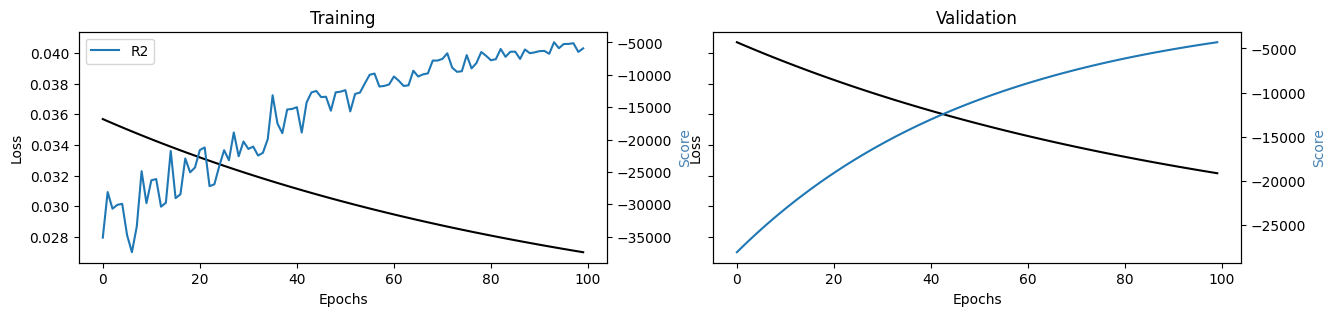

In [121]:
# train/validation
training = model.fit(x=X, y=y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)
# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(training.history['loss'], color='black')

ax[0].set_xlabel('Epochs')

ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')

ax[1].set_xlabel('Epochs')

ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()